# Stats pracitce 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

In [4]:
df = np.random.randint(0,100,100)

mean

In [6]:
np.mean(df)

46.73

In [7]:
#median
np.median(df)

48.0

In [8]:
stats.mode(df)

ModeResult(mode=23, count=4)

## spread

In [10]:
range= np.max(df)-np.min(df)

In [11]:
range

93

In [12]:
max = np.max(df)
min = np.min(df)
range2 = max - min 

In [13]:
range2

93

In [14]:
df

array([86, 36, 86, 93, 64, 86, 21, 19, 32, 75,  5, 87, 92,  8, 65, 60, 56,
       31, 16, 11, 63, 21, 85,  9, 23,  1, 38,  3, 34, 84, 61, 22, 18, 65,
       23, 35, 57, 18, 84, 19, 49, 57, 70, 87, 29, 41, 41, 24,  6, 90, 85,
       89, 54, 62, 68,  1, 70, 65, 93, 23, 20, 48, 61, 53,  6, 48, 70, 64,
       91, 28, 69, 40,  9, 23, 37,  0, 25, 40, 75, 44, 11,  1,  2, 49, 56,
       38, 48, 87,  2, 39, 72, 40, 29, 57, 59, 76, 27, 64, 93, 76])

In [15]:
var = np.var(df, ddof=1)

In [16]:
var

794.5021212121213

In [17]:
std = np.std(df,ddof=1) ## ddof mean here for sample data .. when population we use ddof =0
std

28.186914006540718

In [18]:
df = pd.read_csv('/home/mebi/ML_projects/tips.csv')

In [19]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [20]:
from scipy.stats import skew, kurtosis

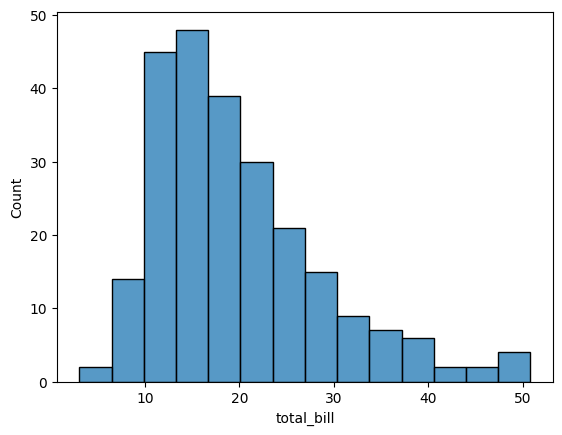

In [21]:
sns.histplot(data = df , x= 'total_bill')
plt.show()

In [22]:
skew = df['total_bill'].skew()
kurtosis = df['total_bill'].kurtosis()

skew


1.1332130376158205

In [23]:
kurtosis

1.2184840156638854

<Axes: xlabel='total_bill'>

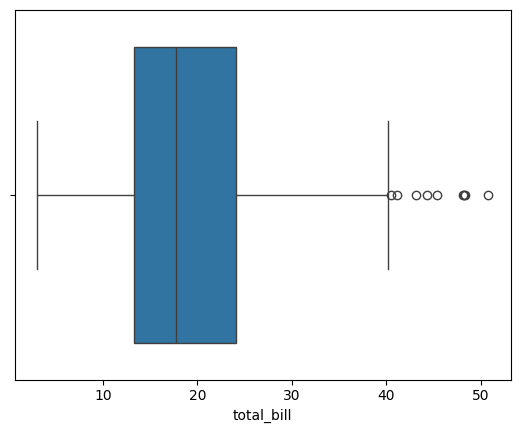

In [24]:
sns.boxplot(data = df,x = "total_bill")

In [25]:
Cleaned_total_bill=df[df['total_bill']<=40]['total_bill']

In [26]:
Cleaned_total_bill.nlargest()

23     39.42
207    38.73
112    38.07
56     38.01
238    35.83
Name: total_bill, dtype: float64

<Axes: ylabel='total_bill'>

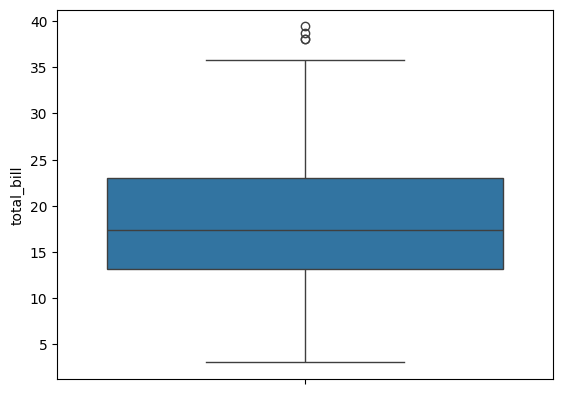

In [27]:
sns.boxplot(Cleaned_total_bill)

In [28]:
Cleaned_total_bill.max()

39.42

In [29]:
Cleaned_total_bill.kurtosis()

-0.017441301605542137

In [103]:
Cleaned_total_bill.skew()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

<Axes: xlabel='total_bill', ylabel='Count'>

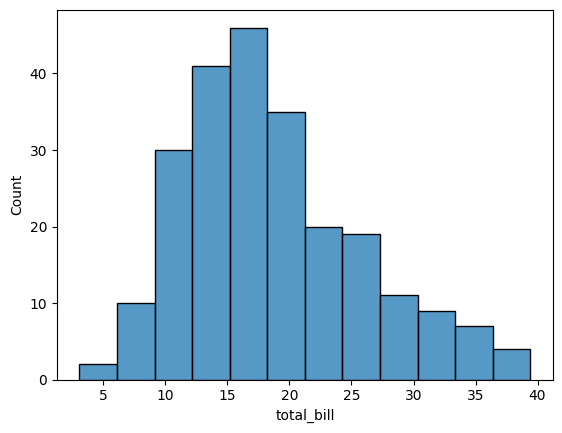

In [30]:
sns.histplot(Cleaned_total_bill)

In [31]:
Cleaned_total_bill = pd.DataFrame({'totalbill': Cleaned_total_bill})

In [32]:
qt_cleaned_total_bill = QuantileTransformer(output_distribution='normal') 

In [33]:
Cleaned_total_bill = qt_cleaned_total_bill.fit_transform(Cleaned_total_bill)

/home/mebi/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (234). n_quantiles is set to n_samples.
  warnings.warn(


In [34]:
Cleaned_total_bill

array([[-0.0484302 ],
       [-1.25273977],
       [ 0.50475076],
       [ 0.71906154],
       [ 0.83550492],
       [ 0.91438416],
       [-1.67252623],
       [ 1.03551346],
       [-0.39170125],
       [-0.42679603],
       [-1.36684524],
       [ 2.0245027 ],
       [-0.3456394 ],
       [ 0.20035658],
       [-0.41504141],
       [ 0.54800133],
       [-1.30136646],
       [-0.18939224],
       [-0.0592039 ],
       [ 0.42679603],
       [ 0.09697433],
       [ 0.37433579],
       [-0.28906428],
       [ 5.19933758],
       [ 0.32288661],
       [ 0.0592039 ],
       [-0.63779805],
       [-0.79058783],
       [ 0.56054567],
       [ 0.28906428],
       [-1.6304601 ],
       [ 0.18939224],
       [-0.38011148],
       [ 0.4445398 ],
       [ 0.0484302 ],
       [ 0.76151097],
       [-0.17845062],
       [-0.06998448],
       [ 0.22235912],
       [ 1.45408498],
       [-0.22235912],
       [ 0.00537906],
       [-0.53554264],
       [-1.55405342],
       [ 1.39475369],
       [ 0

In [35]:
from scipy.stats import shapiro
stat , p = shapiro(Cleaned_total_bill)
print ('stat:', stat )
print ('p:', p)
alpha = 0.05
if p > alpha:
    print("✅ Fail to reject H₀ (Data appears normally distributed)")
else:
    print("❌ Reject H₀ (Data does NOT appear normally distributed)")

stat: 0.9692562401474305
p: 5.8977598714998804e-05
❌ Reject H₀ (Data does NOT appear normally distributed)


<Axes: ylabel='Count'>

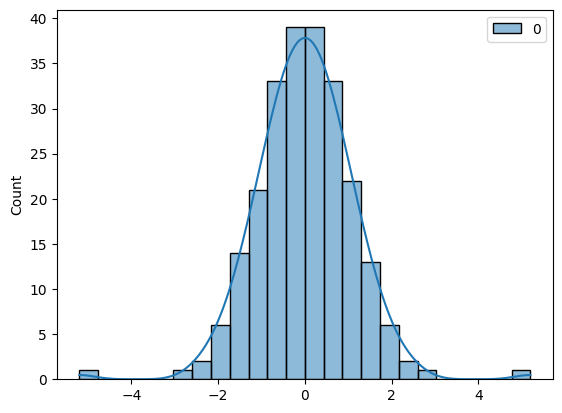

In [36]:
sns.histplot(Cleaned_total_bill, kde=True)

In [37]:
Cleaned_total_bill.std()

1.087481731761707

In [38]:
Cleaned_total_bill.mean()

6.096180968412689e-05

In [39]:
IQR = stats.iqr(Cleaned_total_bill)
print(IQR)

1.349002423424375


In [40]:
df = sns.load_dataset('titanic')

In [41]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [43]:
 df['age'].dropna(inplace=True,)

In [44]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [46]:
df.age.isna().sum()

177

In [47]:
# This removes entire ROWS where your column has NaN
df.dropna(subset=['age'], inplace=True)
print(f"Remaining rows: {len(df)}, NaN count: {df['age'].isna().sum()}")

Remaining rows: 714, NaN count: 0


In [48]:
df['age'].isnull().sum()

0

<Axes: xlabel='age', ylabel='Count'>

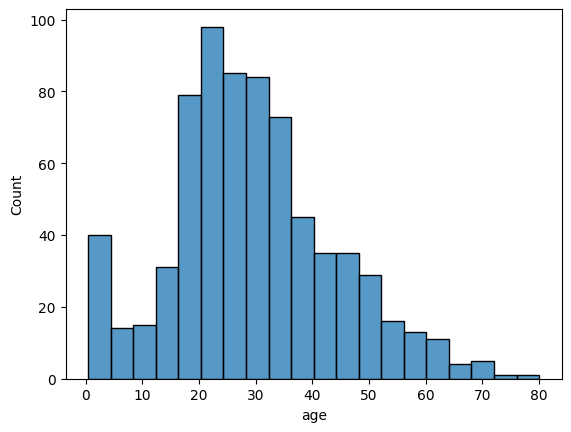

In [49]:
sns.histplot( df['age'])